In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [18]:
raw_data=pd.read_excel('Book3.xlsx',sheet_name='Sheet1')
raw_data.reset_index(drop=True,inplace=True)
raw_data.drop(['READINGS','Unnamed: 0','Unnamed: 82','Unnamed: 83'],axis=1,inplace=True)
raw_data=raw_data[:-3]
#raw_data.fillna(0,)
#raw_data.dropna(inplace=True,axis=1)
#raw_data.head(3)
raw_data.tail(10)

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,BG VAL
45,501.0,508.0,507.0,508.0,513.0,515.0,517.0,518.0,517.0,510.0,...,292.0,291.0,292.0,293.0,293.0,291.0,292.0,292.0,291.0,115.0
46,165.0,162.0,162.0,161.0,160.0,163.0,163.0,163.0,163.0,164.0,...,165.0,165.0,166.0,166.0,165.0,166.0,166.0,166.0,166.0,328.0
47,127.0,121.0,122.0,122.0,121.0,121.0,119.0,118.0,117.0,117.0,...,130.0,130.0,130.0,130.0,130.0,129.0,129.0,129.0,129.0,179.0
48,602.0,601.0,600.0,600.0,601.0,601.0,601.0,600.0,601.0,600.0,...,668.0,668.0,668.0,668.0,668.0,666.0,666.0,665.0,665.0,187.0
49,448.0,442.0,463.0,459.0,468.0,465.0,471.0,450.0,459.0,451.0,...,303.0,295.0,279.0,296.0,292.0,283.0,291.0,293.0,270.0,216.0
50,731.0,738.0,739.0,733.0,731.0,724.0,720.0,709.0,698.0,689.0,...,721.0,719.0,717.0,716.0,712.0,709.0,707.0,701.0,690.0,93.0
51,617.0,633.0,629.0,615.0,616.0,616.0,616.0,621.0,622.0,626.0,...,658.0,654.0,651.0,637.0,638.0,633.0,649.0,661.0,662.0,150.0
52,686.0,693.0,701.0,698.0,695.0,694.0,696.0,693.0,696.0,699.0,...,378.0,381.0,385.0,390.0,385.0,386.0,394.0,386.0,387.0,94.0
53,857.0,851.0,848.0,848.0,845.0,841.0,839.0,835.0,834.0,836.0,...,808.0,806.0,810.0,808.0,810.0,802.0,802.0,806.0,803.0,119.0
54,602.0,605.0,613.0,619.0,626.0,630.0,636.0,636.0,638.0,640.0,...,706.0,705.0,706.0,704.0,706.0,705.0,700.0,701.0,698.0,138.0


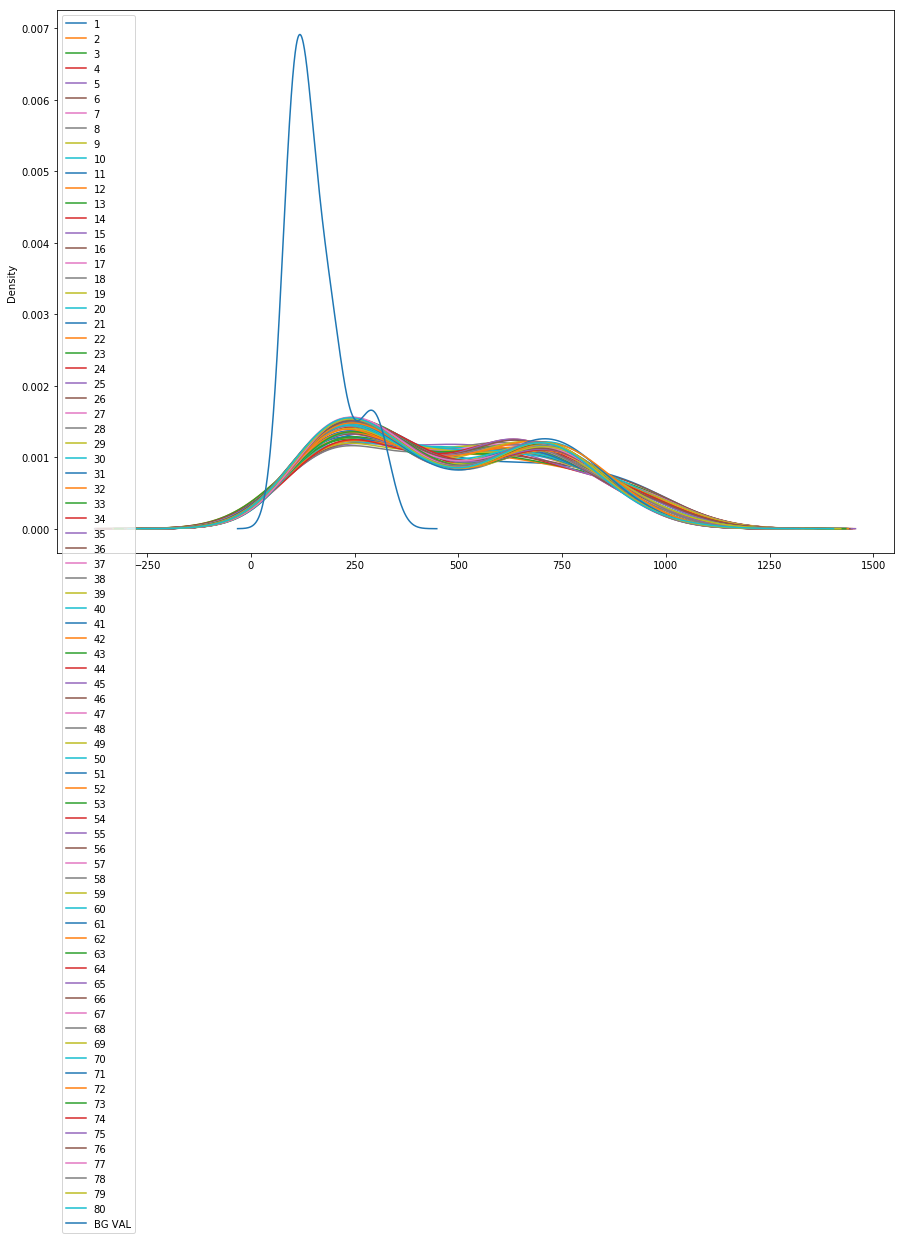

In [19]:
raw_data.plot(kind='kde',figsize=(15,10));

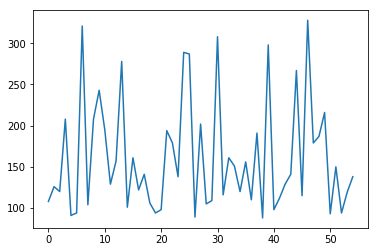

In [20]:
raw_data['BG VAL'].plot()

In [21]:
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
def scale_numerical_data(data,scale=False):
        scaler=MinMaxScaler()
        #scaler=Normalizer()
        #scaler=StandardScaler()
        columns_to_encode=list(data.select_dtypes(include=['float64','int64','object']))
        #print(columns_to_encode)
        features_transform = pd.DataFrame(data = data)
        features_transform[columns_to_encode] = scaler.fit_transform(data[columns_to_encode])
        return features_transform
#data=raw_data.copy()

In [22]:
from sklearn.model_selection import train_test_split
#raw_data=data.copy()
#raw_data=scale_numerical_data(raw_data)
#display(raw_data)
X,y=raw_data.drop(['BG VAL'],axis=1),raw_data['BG VAL']
#display(X)
X=scale_numerical_data(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [23]:
from sklearn.metrics import  accuracy_score,r2_score,mean_squared_error,mean_absolute_error,explained_variance_score
from statsmodels.tools.eval_measures import rmse
def acc_score(y_pred,y_true,show_res=True):

    RMSE=rmse(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    R2=r2_score(y_true,y_pred)
    MAPE=np.mean(np.abs((y_true-y_pred)/y_true))*100
    if show_res==True:
        print(' ERROR MEASURES ')
        print('Root Mean Squared Error: ', RMSE)
        print('Mean Absolute Error: ', MAE)
        print('Mean Absolute Percent Error: ', MAPE)
        print('R2 score: ', R2)
    
    return RMSE,MAE,R2,MAPE

In [24]:
def feature_plot(imp_features,X):
    indices = np.argsort(imp_features)[::-1]
    num_features=len(imp_features[imp_features>0])
    columns = X.columns.values[indices][:num_features]
    values=imp_features[indices][:num_features]

    plt.figure(figsize = (15,5))
    plt.title("Feature importances")
    plt.barh(range(num_features), values, align="center")
    plt.yticks(range(num_features), columns)
    plt.ylim([ num_features,-1])
    plt.show() 
    
def plot_test_data(y_test,y_pred):
    pred_data=y_test.copy()
    pred_data=pred_data.to_frame()
    pred_data['pred']=y_pred
    pred_data.plot(kind='line',use_index=False)
    pred_data.plot(kind='bar',use_index=True)
    plt.show();
    display(pred_data)
    
def get_reg_results(X_train,y_train,X_test,y_test,clf_models,print_var_imp):
    imp_features=None
    for clf in clf_models:
        model_name=clf.__class__.__name__
        print('classifier: ',model_name)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        
        clf_metrics=acc_score(y_test,pred)
        plot_test_data(y_test,pred)
        if print_var_imp:
            try:
                imp_features=clf.feature_importances_
                feature_plot(imp_features,X_train)  
            except AttributeError:
                pass
    return imp_features


def get_model_prediction(X_train,y_train,X_test,y_test,clf_models,print_metrics=False,print_var_imp=False):
    imp_features=None
    for clf in clf_models:
        model_name=clf.__class__.__name__
        print('**Model name: ',model_name)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        print(pred)
        
        if print_metrics:
            clf_metrics=acc_score(y_test,pred)
            plot_test_data(y_test,pred)
        if print_var_imp:
            try:
                imp_features=clf.feature_importances_
                feature_plot(imp_features,X_train)  
            except AttributeError:
                pass
    return imp_features

random_state=42

**Model name:  LinearRegression
[-206.75555229 -171.93855285  161.          225.54705206 4766.48898542
  209.79070077]
 ERROR MEASURES 
Root Mean Squared Error:  1915.2822962717753
Mean Absolute Error:  886.640889623428
Mean Absolute Percent Error:  72.50318863423847
R2 score:  -0.17246545864669494


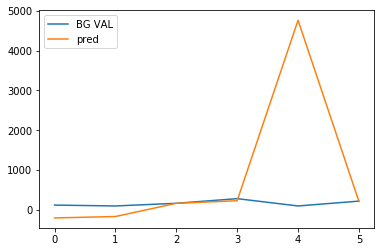

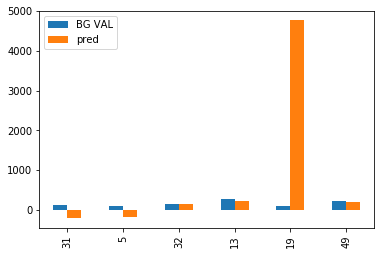

,BG VAL,pred
31,116.0,-206.755552
5,94.0,-171.938553
32,161.0,161.000000
13,278.0,225.547052
19,94.0,4766.488985
49,216.0,209.790701


**Model name:  RandomForestRegressor
[210.6 153.1 144.3 133.4 118.7 161.3]
 ERROR MEASURES 
Root Mean Squared Error:  78.77414973623432
Mean Absolute Error:  65.73333333333333
Mean Absolute Percent Error:  43.035189926886595
R2 score:  -6.415187456599586


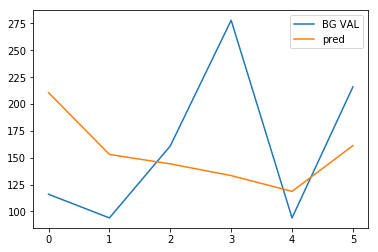

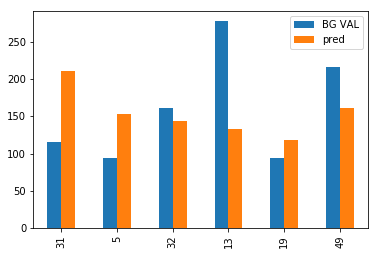

,BG VAL,pred
31,116.0,210.6
5,94.0,153.1
32,161.0,144.3
13,278.0,133.4
19,94.0,118.7
49,216.0,161.3


**Model name:  GradientBoostingRegressor
[203.56755159 183.34806686 155.93678351 138.15326766 110.28862043
 128.46668891]
 ERROR MEASURES 
Root Mean Squared Error:  84.81479583619083
Mean Absolute Error:  70.9412498003876
Mean Absolute Percent Error:  46.52111042292486
R2 score:  -6.0378247574989015


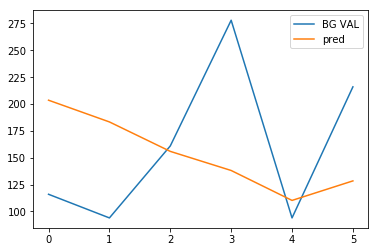

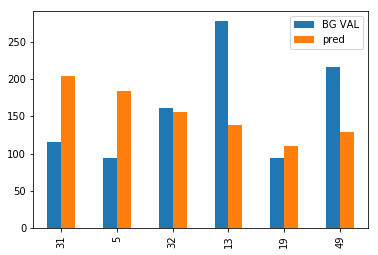

,BG VAL,pred
31,116.0,203.567552
5,94.0,183.348067
32,161.0,155.936784
13,278.0,138.153268
19,94.0,110.288620
49,216.0,128.466689


**Model name:  SGDRegressor
[ 72.49525042 166.66264472  94.00004219 102.3737113   69.76596659
 100.35768078]
 ERROR MEASURES 
Root Mean Squared Error:  97.01077704074277
Mean Absolute Error:  83.11166557387482
Mean Absolute Percent Error:  82.73434595018641
R2 score:  -8.180137325466418


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


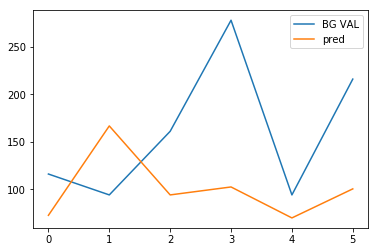

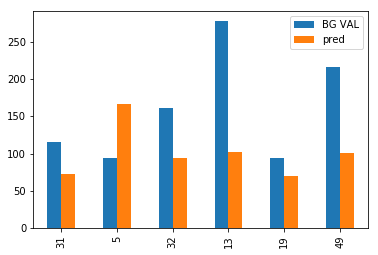

,BG VAL,pred
31,116.0,72.495250
5,94.0,166.662645
32,161.0,94.000042
13,278.0,102.373711
19,94.0,69.765967
49,216.0,100.357681


**Model name:  KNeighborsRegressor
[194.4 147.6 165.4 161.2 197.4 195.6]
 ERROR MEASURES 
Root Mean Squared Error:  75.04314314668153
Mean Absolute Error:  62.833333333333336
Mean Absolute Percent Error:  35.76179580348238
R2 score:  -13.605621707606652


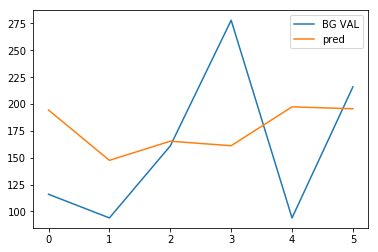

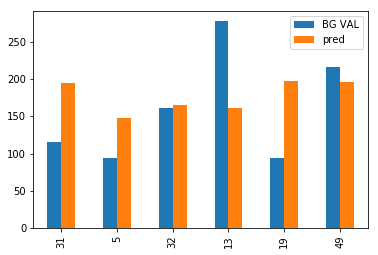

,BG VAL,pred
31,116.0,194.4
5,94.0,147.6
32,161.0,165.4
13,278.0,161.2
19,94.0,197.4
49,216.0,195.6


**Model name:  AdaBoostRegressor
[145.13636364 143.70588235 140.21428571 136.2        129.55
 129.55      ]
 ERROR MEASURES 
Root Mean Squared Error:  73.70695732064262
Mean Absolute Error:  60.57132671250318
Mean Absolute Percent Error:  44.628628078035135
R2 score:  -139.3679368222529


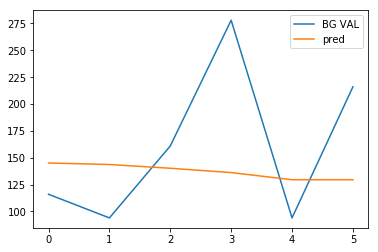

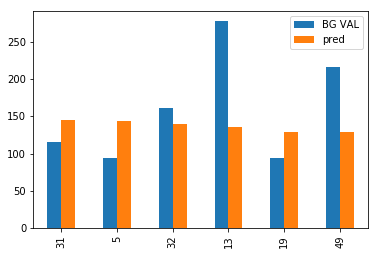

,BG VAL,pred
31,116.0,145.136364
5,94.0,143.705882
32,161.0,140.214286
13,278.0,136.200000
19,94.0,129.550000
49,216.0,129.550000


**Model name:  MLPRegressor
[ 46.15072053 175.28361259  73.43276954  85.26252114  45.81336076
  74.39850977]
 ERROR MEASURES 
Root Mean Squared Error:  114.50956100162068
Mean Absolute Error:  103.53762180984943
Mean Absolute Percent Error:  139.75527982412018
R2 score:  -5.885156130702463


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


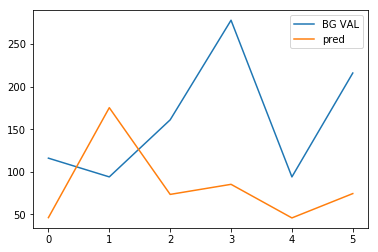

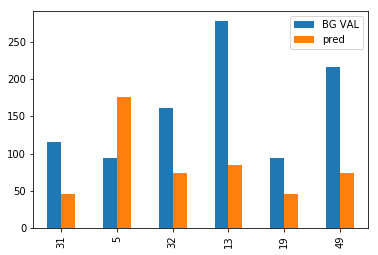

,BG VAL,pred
31,116.0,46.150721
5,94.0,175.283613
32,161.0,73.432770
13,278.0,85.262521
19,94.0,45.813361
49,216.0,74.398510


In [25]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            SGDRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]   
get_model_prediction(x_train,y_train,x_test,y_test,clf_models,True,False)

## Linear Coefficients

### Using 90% of data

 ERROR MEASURES 
Root Mean Squared Error:  1915.2822962717753
Mean Absolute Error:  886.640889623428
Mean Absolute Percent Error:  72.50318863423847
R2 score:  -0.17246545864669494


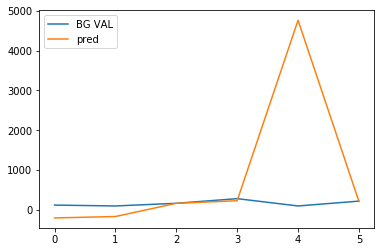

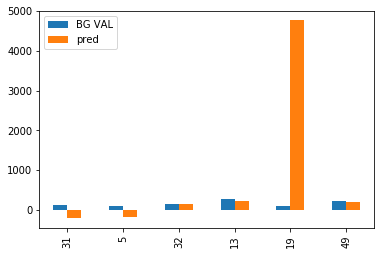

,BG VAL,pred
31,116.0,-206.755552
5,94.0,-171.938553
32,161.0,161.000000
13,278.0,225.547052
19,94.0,4766.488985
49,216.0,209.790701


the intercept of the linear model is 313.6769698505473
The coefficient for 1 is 544.0338798440702
The coefficient for 2 is 245.54525037024612
The coefficient for 3 is -964.8811717454915
The coefficient for 4 is -1421.9764552305646
The coefficient for 5 is -1775.8301199252587
The coefficient for 6 is 1088.1760407600302
The coefficient for 7 is 1990.0970740078994
The coefficient for 8 is 1953.2081694132773
The coefficient for 9 is -425.1464583963882
The coefficient for 10 is -2006.5714551841425
The coefficient for 11 is 841.0008962820866
The coefficient for 12 is 2551.8263527025165
The coefficient for 13 is -2686.8732776457373
The coefficient for 14 is -1126.470592510523
The coefficient for 15 is 723.0261717859823
The coefficient for 16 is 3422.8681182760756
The coefficient for 17 is -502.996004104781
The coefficient for 18 is -495.44873503026463
The coefficient for 19 is -4285.53568047478
The coefficient for 20 is -1005.2960830054019
The coefficient for 21 is 3637.160454351998
The coeff

In [26]:
model = LinearRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
clf_metrics=acc_score(y_test,pred)
plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

### Using all the data

In [27]:
model = LinearRegression()
model.fit(X, y)
#pred=model.predict(x_test)
#clf_metrics=acc_score(y_test,pred)
#plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

the intercept of the linear model is 368.55030420789456
The coefficient for 1 is 330.0860569938198
The coefficient for 2 is 678.7542307247255
The coefficient for 3 is -232.1809092792538
The coefficient for 4 is -2232.6838383745176
The coefficient for 5 is -2213.704679463117
The coefficient for 6 is -181.8826500718634
The coefficient for 7 is 3838.0020192229376
The coefficient for 8 is 767.9147757996595
The coefficient for 9 is 863.3116158845075
The coefficient for 10 is -2184.4586952775776
The coefficient for 11 is 1299.7715068954462
The coefficient for 12 is 927.765425816044
The coefficient for 13 is -3699.498421029071
The coefficient for 14 is 939.161825996913
The coefficient for 15 is -907.3876626450751
The coefficient for 16 is 4410.622641655751
The coefficient for 17 is -574.180286295017
The coefficient for 18 is -756.7559070324369
The coefficient for 19 is -2850.4391582825588
The coefficient for 20 is -1019.5320577125775
The coefficient for 21 is 4291.990822972964
The coefficient

## Model Predictions

In [28]:
new_data=pd.read_excel('STANDARDS-WEARABLE-NATRAJ PREDICTION.xlsx',sheet_name='PREDICTION-DETAILS',header=None,
                      usecols="G", na_values=['Orig ADC']).dropna().T
y_test=new_data[0]
x_test=new_data.drop([0],axis=1)

In [29]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            SGDRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]

x_test=scale_numerical_data(x_test)
get_model_prediction(X,y,x_test,None,clf_models)
print('Actual Glucose Level',y_test)

**Model name:  LinearRegression
[368.55030421]
**Model name:  RandomForestRegressor
[196.4]
**Model name:  GradientBoostingRegressor
[195.45231702]
**Model name:  SGDRegressor
[45.61276059]
**Model name:  KNeighborsRegressor
[161.4]
**Model name:  AdaBoostRegressor
[193.5]
**Model name:  MLPRegressor


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[3.71086906]
Actual Glucose Level 0    442.0
Name: 0, dtype: float64
